# Introduction


**What?** Time series visualisation with pandas



# Import modules

In [15]:
from pylab import rcParams
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import Grouper
from pandas import concat
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20

### Reading in dataset

In [2]:
series = read_csv('../DATASETS/daily-min-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)

In [6]:
series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

### Line plot

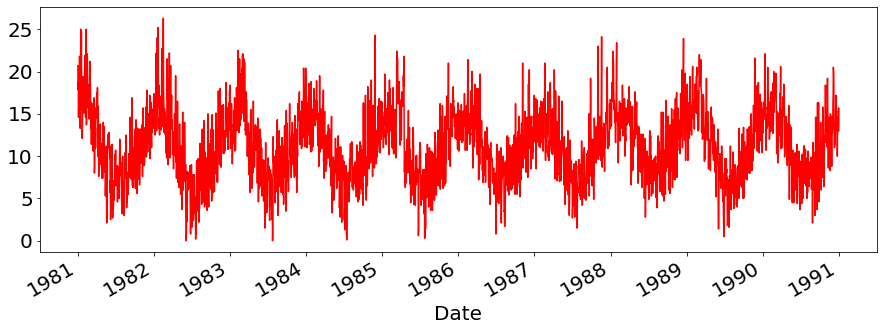

In [16]:
series.plot(c="r")
pyplot.show()


- Running the example creates 10 line plots, one for each year from 1981 at the top and 1990 at the bottom, where each line plot is 365 days in length.



In [17]:
groups = series.groupby(Grouper(freq='A')) 
years = DataFrame()

In [18]:
pd.DataFrame(groups)

,0,1
0,1981-12-31,Date 1981-01-01 20.7 1981-01-02 17.9 198...
1,1982-12-31,Date 1982-01-01 17.0 1982-01-02 15.0 198...
2,1983-12-31,Date 1983-01-01 18.4 1983-01-02 15.0 198...
3,1984-12-31,Date 1984-01-01 19.5 1984-01-02 17.1 198...
4,1985-12-31,Date 1985-01-01 13.3 1985-01-02 15.2 198...
5,1986-12-31,Date 1986-01-01 12.9 1986-01-02 13.8 198...
6,1987-12-31,Date 1987-01-01 12.3 1987-01-02 13.8 198...
7,1988-12-31,Date 1988-01-01 15.3 1988-01-02 14.3 198...
8,1989-12-31,Date 1989-01-01 14.3 1989-01-02 17.4 198...
9,1990-12-31,Date 1990-01-01 14.8 1990-01-02 13.3 199...


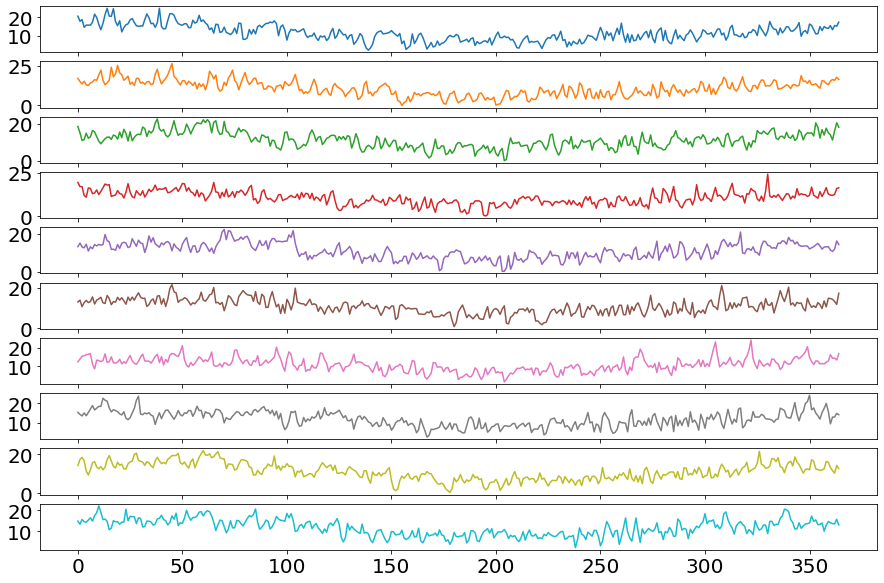

In [22]:
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)

rcParams['figure.figsize'] = 15,13
pyplot.show()

### Histogram and Density Plots

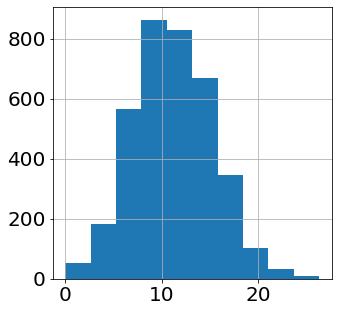

In [24]:
series.hist()
rcParams['figure.figsize'] = 5,5
pyplot.show()


- We can get a better idea of the shape of the distribution of observations by using a density plot. 
- This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution. 



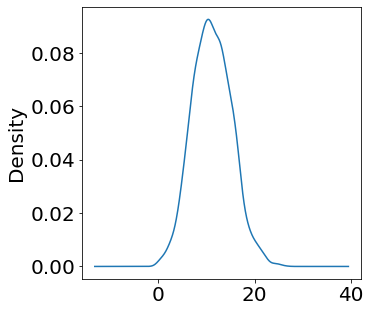

In [25]:
series.plot(kind='kde') 
pyplot.show()

### Box and Whisker Plots by Interval


- Whisker plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50%  of observations. 
- A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. 
- Dots are drawn for outliers outside the whiskers or extents of the data.



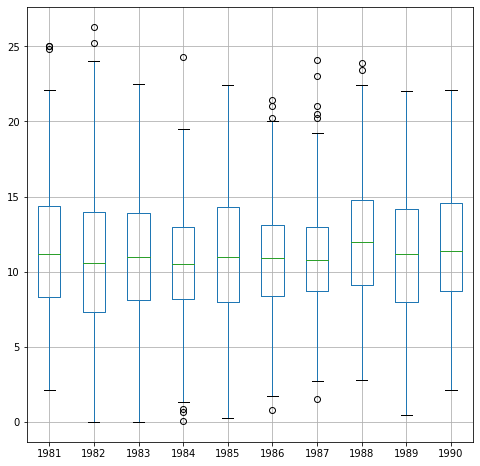

In [29]:
groups = series.groupby(Grouper(freq='A')) 
years = DataFrame()

for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()


- We may also be interested in the distribution of values across months within a year. 
- The example below creates 12 box and whisker plots, one for each month of 1990, the last year in the dataset. 
- In the example, first, only observations from 1990 are extracted.



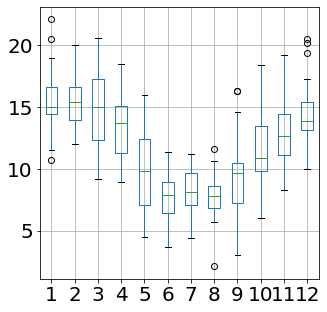

In [26]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1) 
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

### Heat Maps

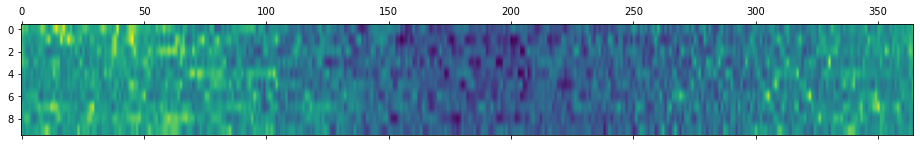

In [34]:
groups = series.groupby(Grouper(freq='A')) 
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto') 
pyplot.show()


- As with the box and whisker plot example above, we can also compare the months within a year. 
- Below is an  example of a heat map comparing the months of the year in 1990. 
- Each column represents one month, with rows representing the days of the month from 1 to 31.



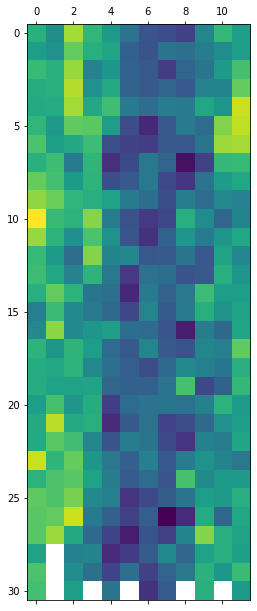

In [35]:
ne_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1) 
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto') 
pyplot.show()

### Lag Scatter Plots


- Time series modeling assumes a relationship between an observation and the previous observation. 
- Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag=2, and so on.
- The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.



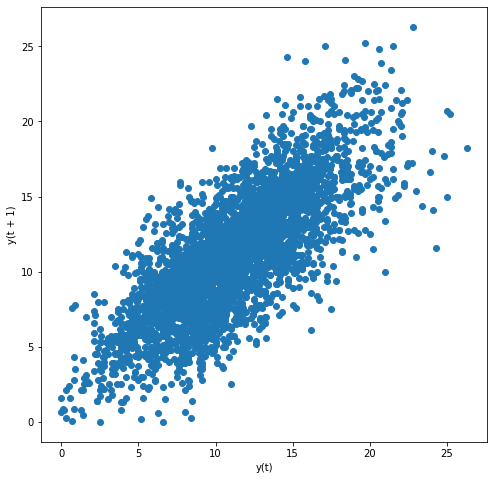

In [38]:
lag_plot(series)
pyplot.show()


- For example, we can create a scatter plot for the observation with each value in the previous seven days.
- Running the example suggests the strongest relationship between an observation with its lag=1 value, but generally a good positive correlation with each value in the last week.



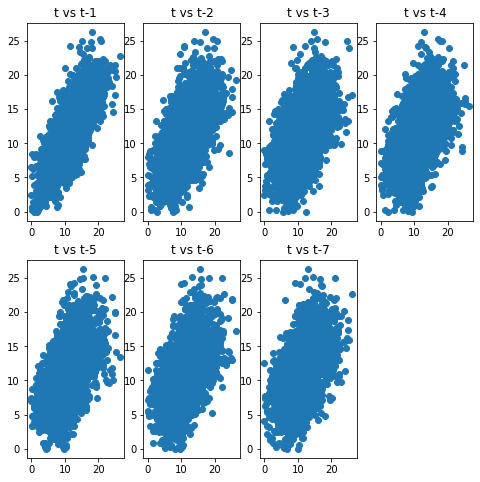

In [43]:
values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))

dataframe = concat(columns, axis=1) 
columns = ['t']
    
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i)) 

dataframe.columns = columns 
pyplot.figure(1)

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()                             

### Autocorrelation


- We can quantify the strength and type of relationship between observations and their lags. 
- In statistics, this is called correlation, and when calculated against lag values in time series, it is called AUTOCORRELATION (self-correlation). 
- A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. 
- The sign of this number indicates a negative or positive correlation respectively.



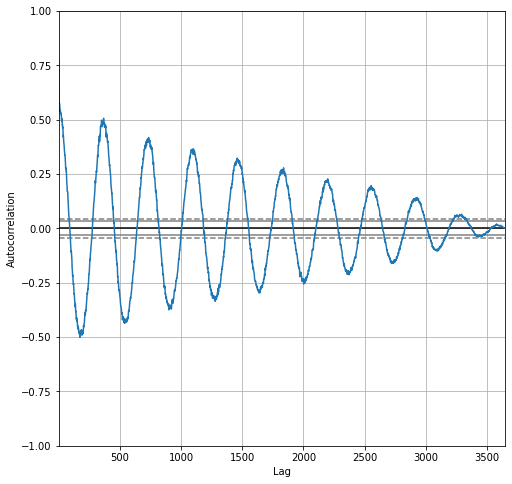

In [46]:
autocorrelation_plot(series)
pyplot.show()

# References


- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search

